## Project description

Project task is to help optimize marketing expenses at Yandex.Afisha.

In accordance with the task, the following questions are formulated:

- How people use the product?

- When they start to buy?

- How much money each customer brings?

- When they pay off?

## Table of contents:
- [**STEP 1. General information and preprocessing data**](#first-step)
- [**STEP 2. Making reports and calculating metrics**](#second-step)
    - [2.1. Product](#product) 
    - [How many people use product every day, week, and month?](#how-many-people-use-product-every-day-week-and-month) 
    - [How many sessions are there per day](#how-many-sessions-are-there-per-day)
    - [How often do users come back?](#how-often-do-users-come-back)
    - [2.2. Sales](#sales) 
    - [When do people start buying?](#when-do-people-start-buying)
    - [How many orders do they make during a given period of time?](#how-many-orders-do-they-make-during-a-given-period-of-time)
    - [What is the average purchase size?](#what-is-the-average-purchase-size)
    - [How much money do they bring? (LTV)](#how-much-money-do-they-bring)
    - [2.3. Marketing](#marketing) 
    - [How much money was spent?](#how-much-money-was-spent) 
    - [How much did customer acquisition from each of the sources cost?](#how-much-did-customer-acquisition-from-each-of-the-sources-cost)
    - [How worthwhile where the investments?](#how-worthwhile-where-the-investments)
- [**STEP 3. General conclusion**](#third-step)

## STEP 1. General information and preprocessing data <a class="anchor" id="first-step"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns


In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')

In [3]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [5]:
visits['Device'].value_counts(normalize=True) * 100

desktop    73.05704
touch      26.94296
Name: Device, dtype: float64

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [7]:
visits = pd.read_csv('/datasets/visits_log_us.csv', 
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts']) 

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [9]:
visits.duplicated().sum()

0

In [10]:
orders = pd.read_csv('/datasets/orders_log_us.csv')
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
orders = pd.read_csv('/datasets/orders_log_us.csv', 
                  parse_dates=['Buy Ts']) 

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [14]:
orders['Buy Ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: Buy Ts, dtype: object

In [15]:
orders.duplicated().sum()

0

In [16]:
costs = pd.read_csv('/datasets/costs_us.csv')
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [17]:
costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [18]:
costs['source_id'].value_counts().reset_index().sort_values(by='index')

,index,source_id
3,1,363
6,2,363
2,3,363
5,4,363
0,5,364
1,9,363
4,10,363


In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [20]:
costs = pd.read_csv('/datasets/costs_us.csv', 
                  parse_dates=['dt']) 

In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [22]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [23]:
costs.duplicated().sum()

0

**CONCLUSION**

We have 3 tables with data: visits, orders, costs for the period from 01.06.2017 till 01.06.2018. 

Data 'visits' consists of 5 columns and 359400 rows. There is no missing values and no obvious duplicates. The column 'Device' has only two values: desktop and touch. So we converted the data type to category. Also columns 'Start Ts' and 'End Ts' was needed in converting data type from object to datetime. Acording to data in column 'Device' the most of people visit Afisha.Yandex from desktop, 73%,  and only 27% from touch. 

Table 'orders' contains 3 co,umns and 50415 rows. There is no missing values and no obvious duplicates. We converted data type of the column 'Buy Ts' from object to datetime.

We have data about 'costs', which consists of 3 columns and  2542 rows. The column 'dt' was required changing the data type to datetime. The data in column 'source_id' takes values from 1 to 10. Besides in the period under review, there are no values 6,7,8. Other values are quantitatively the same.



## STEP 2. Making reports and calculating metrics <a class="anchor" id="second-step"></a>

### 2.1. Product <a class="anchor" id="product"></a>

### How many people use product every day, week, and month? <a class="anchor" id="how-many-people-use-product-every-day-week-and-month"></a>

In [24]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [25]:
#extracting date, week, month and year
visits['start_date'] = visits['Start Ts'].astype(
    'datetime64[D]')
visits['start_week'] = visits['Start Ts'].astype(
    'datetime64[W]')
visits['start_month'] = visits['Start Ts'].astype(
    'datetime64[M]')
visits['start_year'] = visits['Start Ts'].astype(
    'datetime64[Y]')

In [26]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_week,start_month,start_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01


In [27]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_week,start_month,start_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,2017-01-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,2018-01-01
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-11-02,2017-11-01,2017-01-01
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07-13,2017-07-01,2017-01-01
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11-02,2017-11-01,2017-01-01


In [28]:
#calculating daily active users
dau = visits.groupby('start_date').agg({'Uid': 'nunique'}).mean()
print('DAU: {:,}'.format(int(dau)))

DAU: 907


In [29]:
#calculating weekly active users
wau = visits.groupby(['start_year', 'start_week']).agg({'Uid': 'nunique'}).mean()
print('WAU: {:,}'.format(int(wau)))

WAU: 5,621


In [30]:
#calculating monthly active users
mau = visits.groupby(['start_year', 'start_month']).agg({'Uid': 'nunique'}).mean()
print('MAU: {:,}'.format(int(mau)))

MAU: 23,228


**CONCLUSION**

We calculated the number of daily active users - 907, the number of weekly active users - 5716 and the number of people who uses product every month - 23228. It looks good for investors and for further product development.

### How many sessions are there per day? (One user might have more than one session.) <a class="anchor" id="how-many-sessions-are-there-per-day"></a>

In [31]:
#calculating daily active sessions
das = visits.groupby('start_date')['Uid'].count().agg('mean')
print('DAS: {:,}'.format(int(das)))


DAS: 987


**CONCLUSION**

Users perform 987 sessions daily, some of them perform more than 1 session per day, but most of them still perform once a day, since for comparison, the number of active users per day is 907.

### What is the length of each session? <a class="anchor" id="what-is-the-length-of-each-session"></a>

In [32]:
#adding the column where calculating the length of each session
visits['session_length'] = visits['End Ts'] - visits['Start Ts']
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_week,start_month,start_year,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,00:00:00


In [33]:
visits['session_length'].sort_values().tail(10)

257551   07:59:00
73461    08:04:00
342154   08:06:00
125667   08:22:00
337996   08:34:00
221945   08:44:00
1197     09:02:00
248062   09:08:00
177381   09:56:00
229891   11:51:00
Name: session_length, dtype: timedelta64[ns]

In [34]:
visits['session_length'].sort_values().head(10)

177972   -1 days +23:14:00
4181     -1 days +23:28:00
141593            00:00:00
251174            00:00:00
70748             00:00:00
251186            00:00:00
251189            00:00:00
70738             00:00:00
23866             00:00:00
251214            00:00:00
Name: session_length, dtype: timedelta64[ns]

In [35]:
import datetime
row_indexes = visits.index[visits['session_length'] < datetime.timedelta(days=0)].tolist()
row_indexes

[4181, 177972]

In [36]:
visits.loc[row_indexes]

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_week,start_month,start_year,session_length
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018-03-25,2018-03-22,2018-03-01,2018-01-01,-1 days +23:28:00
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018-03-25,2018-03-22,2018-03-01,2018-01-01,-1 days +23:14:00


In [37]:
visits['session_length'].describe()

count                    359400
mean     0 days 00:10:43.025687
std      0 days 00:16:37.127760
min           -1 days +23:14:00
25%             0 days 00:02:00
50%             0 days 00:05:00
75%             0 days 00:14:00
max             0 days 11:51:00
Name: session_length, dtype: object

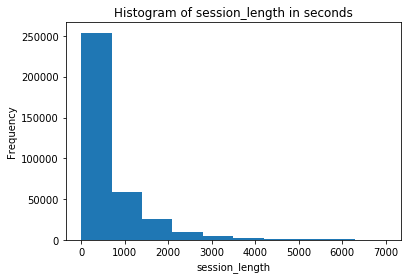

In [38]:
visits_duration_in_sec = visits['session_length'] / np.timedelta64(1, 's')
visits_duration_in_sec.sort_values().plot(kind='hist', bins=10, range=[0,7000], title='Histogram of session_length in seconds')
plt.xlabel('session_length')
plt.show( )

On the histogram we can see that there are more data points above the mean and the distribution is skewed to the right. 

**CONCLUSION**

The median value of session length is 5 minutes. The maximum recorded session duration was almost 12 hours, it is possible that the site was constantly open, and the user's computer does not turn on standby mode. In the resulting column 'session_length', there are two negative values. They are obviously connected with the fact that in the user's country on that day the clock was set back one hour.

### How often do users come back? <a class="anchor" id="how-often-do-users-come-back"></a>

In [39]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 10 columns):
Device            359400 non-null category
End Ts            359400 non-null datetime64[ns]
Source Id         359400 non-null int64
Start Ts          359400 non-null datetime64[ns]
Uid               359400 non-null uint64
start_date        359400 non-null datetime64[ns]
start_week        359400 non-null datetime64[ns]
start_month       359400 non-null datetime64[ns]
start_year        359400 non-null datetime64[ns]
session_length    359400 non-null timedelta64[ns]
dtypes: category(1), datetime64[ns](6), int64(1), timedelta64[ns](1), uint64(1)
memory usage: 25.0 MB


In [40]:
#changing date type
visits['start_date'] = pd.to_datetime(visits['start_date'])
#adding column first activity date
first_activity_date = visits.groupby(['Uid'])['start_date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='Uid')


In [41]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_week,start_month,start_year,session_length,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,00:18:00,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,00:28:00,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,00:00:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,00:24:00,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,00:00:00,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,2017-01-01,00:01:00,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,2018-01-01,00:56:00,2017-06-29
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-11-02,2017-11-01,2017-01-01,00:01:00,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07-13,2017-07-01,2017-01-01,00:03:00,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11-02,2017-11-01,2017-01-01,00:01:00,2017-11-08


In [42]:
visits['start_week'] = pd.to_datetime(visits['start_date'], unit='d') - pd.to_timedelta(visits['start_date'].dt.dayofweek, unit='d')
visits['first_activity_week'] = pd.to_datetime(visits['first_activity_date'], unit='d') - pd.to_timedelta(visits['first_activity_date'].dt.dayofweek, unit='d')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_week,start_month,start_year,session_length,first_activity_date,first_activity_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01,2017-01-01,00:18:00,2017-12-20,2017-12-18
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,2018-01-01,00:28:00,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,2017-01-01,00:00:00,2017-07-01,2017-06-26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01,2018-01-01,00:24:00,2018-03-09,2018-03-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12-01,2017-01-01,00:00:00,2017-12-27,2017-12-25


In [43]:
visits['cohort_lifetime'] = visits['start_week'] - visits['first_activity_week']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'W')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

In [44]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_week,start_month,start_year,session_length,first_activity_date,first_activity_week,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01,2017-01-01,00:18:00,2017-12-20,2017-12-18,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,2018-01-01,00:28:00,2018-02-19,2018-02-19,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,2017-01-01,00:00:00,2017-07-01,2017-06-26,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01,2018-01-01,00:24:00,2018-03-09,2018-03-05,10
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12-01,2017-01-01,00:00:00,2017-12-27,2017-12-25,0


In [45]:
cohorts = visits.groupby(['first_activity_week','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()

In [46]:
# building the data frame
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','Uid']]
initial_users_count.head()

,first_activity_week,Uid
0,2017-05-29,2021
53,2017-06-05,3944
105,2017-06-12,2567
156,2017-06-19,2585
206,2017-06-26,2717


In [47]:
# renaming the data frame column
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
# joining the data frames cohorts and initital_users_count
cohorts = cohorts.merge(initial_users_count,on='first_activity_week')
# calculating retention rate
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']

In [48]:
# Compile pivot table
retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='cohort_lifetime',values='retention',aggfunc='sum') 
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
first_activity_week,,,,,,,,,,,,,,,,,,,,,
2017-05-29,1.0,0.091539,0.048491,0.036616,0.043543,0.041069,0.037110,0.036121,0.029193,0.022266,...,0.028699,0.022266,0.027214,0.028204,0.029193,0.021771,0.023751,0.030183,0.030183,0.022761
2017-06-05,1.0,0.037272,0.028905,0.025355,0.022059,0.024848,0.021805,0.017495,0.014706,0.018002,...,0.015213,0.015467,0.019016,0.013438,0.012931,0.012677,0.019270,0.017748,0.014959,NaN
2017-06-12,1.0,0.040904,0.026101,0.022984,0.022205,0.019868,0.015582,0.016362,0.013245,0.018309,...,0.013635,0.012466,0.011297,0.010518,0.010518,0.009739,0.013635,0.008181,NaN,NaN
2017-06-19,1.0,0.035590,0.024371,0.024371,0.022824,0.015474,0.012766,0.008124,0.010445,0.013926,...,0.011605,0.011605,0.010058,0.006963,0.009671,0.010058,0.006963,NaN,NaN,NaN
2017-06-26,1.0,0.038646,0.026500,0.019875,0.015090,0.012882,0.011410,0.011042,0.013986,0.014722,...,0.006257,0.005153,0.006625,0.008833,0.010305,0.009569,NaN,NaN,NaN,NaN
2017-07-03,1.0,0.046600,0.028996,0.020021,0.013117,0.014843,0.013807,0.010356,0.013117,0.015533,...,0.004142,0.005523,0.007594,0.004487,0.007594,NaN,NaN,NaN,NaN,NaN
2017-07-10,1.0,0.038392,0.017380,0.013230,0.010376,0.011414,0.012711,0.011154,0.013748,0.012192,...,0.006485,0.008301,0.009857,0.008560,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-17,1.0,0.033780,0.024041,0.013999,0.016738,0.016433,0.015520,0.017955,0.015825,0.017042,...,0.008825,0.007304,0.006391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-24,1.0,0.024424,0.017051,0.018894,0.014747,0.017972,0.021198,0.014747,0.016129,0.013364,...,0.005069,0.004608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**CONCLUSION**

The first-week retention rate was maximum and from the next week decreased significantly. Whereas the first-week retention rate for the cohort that joined between May 29 and June 5 was 0,092, for the June 5-11 cohort it was 0.037. But after that retention rate doesn't change significant.

In [49]:

visits['first_activity_month'] = pd.to_datetime(visits['first_activity_date'], unit='m') - pd.to_timedelta((visits['first_activity_date'].dt.day - 1), unit='d')
visits.head()


,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_week,start_month,start_year,session_length,first_activity_date,first_activity_week,cohort_lifetime,first_activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01,2017-01-01,00:18:00,2017-12-20,2017-12-18,0,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,2018-01-01,00:28:00,2018-02-19,2018-02-19,0,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,2017-01-01,00:00:00,2017-07-01,2017-06-26,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01,2018-01-01,00:24:00,2018-03-09,2018-03-05,10,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12-01,2017-01-01,00:00:00,2017-12-27,2017-12-25,0,2017-12-01


In [50]:
visits['cohort_lifetime_month'] = visits['start_month'] - visits['first_activity_month']
visits['cohort_lifetime_month'] = visits['cohort_lifetime_month'] / np.timedelta64(1,'M')
visits['cohort_lifetime_month'] = visits['cohort_lifetime_month'].round()

In [51]:
cohorts_month = visits.groupby(['first_activity_month','cohort_lifetime_month']).agg({'Uid':'nunique'}).reset_index()

In [52]:
# building the data frame
initial_users_count_month = cohorts_month[cohorts_month['cohort_lifetime_month'] == 0][['first_activity_month','Uid']]

In [53]:
# renaming the data frame column
initial_users_count_month = initial_users_count_month.rename(columns={'Uid':'cohort_month_users'})
# joining the data frames cohorts and initital_users_count
cohorts_month = cohorts_month.merge(initial_users_count_month,on='first_activity_month')
# calculating retention rate
cohorts_month['retention_month'] = cohorts_month['Uid']/cohorts_month['cohort_month_users']

# Compile pivot table
retention_month_pivot = cohorts_month.pivot_table(index='first_activity_month',columns='cohort_lifetime_month',values='retention_month',aggfunc='sum') 
retention_month_pivot

cohort_lifetime_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


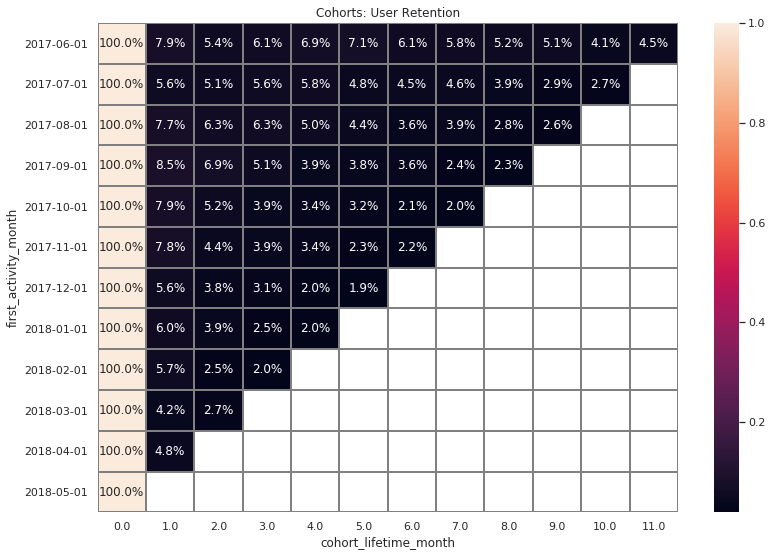

In [54]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
heatmap_retention_month = sns.heatmap(
    retention_month_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
) 
xticklabels = []
for item in heatmap_retention_month.get_xticklabels():
    item.set_text(str(item.get_text())[:10])
    xticklabels += [item]
yticklabels = []
for item in heatmap_retention_month.get_yticklabels():
    item.set_text(str(item.get_text())[:10])
    yticklabels += [item]

heatmap_retention_month.set_xticklabels(xticklabels)
heatmap_retention_month.set_yticklabels(yticklabels)

plt.show()




**CONCLUSION**

We see that the dynamics of the retention rate for the first two cohort months (June-July 2017) differs from the rest. Retention rate in the second lifetime month falls, and starting from the third month it rises again for 3-4 months, after which it starts to decline again. On the same time retention rate of the rest of cohorts was dicreasing each month. The retention rate was maximum for the cohort which join in September 2017 (8.5%) and minimum for March 2018 (4.2%). 

**PRODUCT OVERVIEW**

•	there were 907 users daily, 5716 weekly and 23228 per month

•	73% logged in from desktop and only 27% from touch devices

•	overwhelming majority of Customers had just 1 session per day

•	mean value of session length is about 5 minutes

•	the highest retention rate was in the first week and the retention rate was maximum for the cohort which join in September 2017


### 2.2. Sales  <a class="anchor" id="sales"></a>

### When do people start buying? <a class="anchor" id="when-do-people-start-buying"></a>

(In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

In [55]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_week,start_month,start_year,session_length,first_activity_date,first_activity_week,cohort_lifetime,first_activity_month,cohort_lifetime_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01,2017-01-01,00:18:00,2017-12-20,2017-12-18,0,2017-12-01,0.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,2018-01-01,00:28:00,2018-02-19,2018-02-19,0,2018-02-01,0.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,2017-01-01,00:00:00,2017-07-01,2017-06-26,0,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01,2018-01-01,00:24:00,2018-03-09,2018-03-05,10,2018-03-01,2.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12-01,2017-01-01,00:00:00,2017-12-27,2017-12-25,0,2017-12-01,0.0


In [56]:
#finding the first visit day per user
first_visit_per_user = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visit_per_user['Start Ts'] = first_visit_per_user['Start Ts'].astype('datetime64[D]')
first_visit_per_user.head()

,Uid,Start Ts
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [57]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [58]:
#finding the first order day per user
first_order_per_user = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_order_per_user['Buy Ts'] = first_order_per_user['Buy Ts'].astype('datetime64[D]')
first_order_per_user.head()

,Uid,Buy Ts
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [59]:
#merging tables with first visit day and first order day
first_visit_and_order_per_user = pd.merge(first_visit_per_user, first_order_per_user, on='Uid')
first_visit_and_order_per_user.head()

,Uid,Start Ts,Buy Ts
0,313578113262317,2017-09-18,2018-01-03
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-27,2018-01-28
4,2551852515556206,2017-11-24,2017-11-24


In [60]:
#finding amount of days between first visit and first order
first_visit_and_order_per_user['difference_start_buy'] = (first_visit_and_order_per_user['Buy Ts'] - first_visit_and_order_per_user['Start Ts']) / np.timedelta64(1,'D')
first_visit_and_order_per_user.head()

,Uid,Start Ts,Buy Ts,difference_start_buy
0,313578113262317,2017-09-18,2018-01-03,107.0
1,1575281904278712,2017-06-03,2017-06-03,0.0
2,2429014661409475,2017-10-11,2017-10-11,0.0
3,2464366381792757,2018-01-27,2018-01-28,1.0
4,2551852515556206,2017-11-24,2017-11-24,0.0


In [61]:
# grouping conversion by users
conversion = first_visit_and_order_per_user.groupby('difference_start_buy')['Uid'].count().sort_values(ascending = False).reset_index()
conversion.head()

,difference_start_buy,Uid
0,0.0,25039
1,1.0,1966
2,2.0,685
3,3.0,452
4,4.0,386


In [62]:
#finding percentage
conversion['percentage'] = (conversion['Uid'] / len(first_visit_and_order_per_user) *100).round(2)
conversion.head(10)                                                

,difference_start_buy,Uid,percentage
0,0.0,25039,68.56
1,1.0,1966,5.38
2,2.0,685,1.88
3,3.0,452,1.24
4,4.0,386,1.06
5,5.0,307,0.84
6,6.0,264,0.72
7,7.0,237,0.65
8,8.0,216,0.59
9,9.0,162,0.44


In [63]:
#finding users with 0 days conversion
conversion_0days = first_visit_and_order_per_user.query('difference_start_buy == 0.0')
conversion_0days.head()

,Uid,Start Ts,Buy Ts,difference_start_buy
1,1575281904278712,2017-06-03,2017-06-03,0.0
2,2429014661409475,2017-10-11,2017-10-11,0.0
4,2551852515556206,2017-11-24,2017-11-24,0.0
5,3077748354309989,2018-03-03,2018-03-03,0.0
7,3753586865891862,2018-03-03,2018-03-03,0.0


In [64]:
#merging table conversion_0days  with visits
conversion_0days = conversion_0days.merge(visits, on='Uid')
conversion_0days.head()

,Uid,Start Ts_x,Buy Ts,difference_start_buy,Device,End Ts,Source Id,Start Ts_y,start_date,start_week,start_month,start_year,session_length,first_activity_date,first_activity_week,cohort_lifetime,first_activity_month,cohort_lifetime_month
0,1575281904278712,2017-06-03,2017-06-03,0.0,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017-05-29,2017-06-01,2017-01-01,00:04:00,2017-06-03,2017-05-29,0,2017-06-01,0.0
1,1575281904278712,2017-06-03,2017-06-03,0.0,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017-05-29,2017-06-01,2017-01-01,00:12:00,2017-06-03,2017-05-29,0,2017-06-01,0.0
2,2429014661409475,2017-10-11,2017-10-11,0.0,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017-10-11,2017-10-09,2017-10-01,2017-01-01,00:13:00,2017-10-11,2017-10-09,0,2017-10-01,0.0
3,2551852515556206,2017-11-24,2017-11-24,0.0,desktop,2017-11-24 11:31:00,5,2017-11-24 11:22:00,2017-11-24,2017-11-20,2017-11-01,2017-01-01,00:09:00,2017-11-24,2017-11-20,0,2017-11-01,0.0
4,2551852515556206,2017-11-24,2017-11-24,0.0,desktop,2017-11-24 10:14:19,5,2017-11-24 10:14:00,2017-11-24,2017-11-20,2017-11-01,2017-01-01,00:00:19,2017-11-24,2017-11-20,0,2017-11-01,0.0


In [65]:
#dropping duplicate column
conversion_0days = conversion_0days.drop(columns=['Start Ts_y'])
conversion_0days.head()

,Uid,Start Ts_x,Buy Ts,difference_start_buy,Device,End Ts,Source Id,start_date,start_week,start_month,start_year,session_length,first_activity_date,first_activity_week,cohort_lifetime,first_activity_month,cohort_lifetime_month
0,1575281904278712,2017-06-03,2017-06-03,0.0,touch,2017-06-03 10:17:00,10,2017-06-03,2017-05-29,2017-06-01,2017-01-01,00:04:00,2017-06-03,2017-05-29,0,2017-06-01,0.0
1,1575281904278712,2017-06-03,2017-06-03,0.0,touch,2017-06-03 17:48:00,10,2017-06-03,2017-05-29,2017-06-01,2017-01-01,00:12:00,2017-06-03,2017-05-29,0,2017-06-01,0.0
2,2429014661409475,2017-10-11,2017-10-11,0.0,desktop,2017-10-11 17:27:00,3,2017-10-11,2017-10-09,2017-10-01,2017-01-01,00:13:00,2017-10-11,2017-10-09,0,2017-10-01,0.0
3,2551852515556206,2017-11-24,2017-11-24,0.0,desktop,2017-11-24 11:31:00,5,2017-11-24,2017-11-20,2017-11-01,2017-01-01,00:09:00,2017-11-24,2017-11-20,0,2017-11-01,0.0
4,2551852515556206,2017-11-24,2017-11-24,0.0,desktop,2017-11-24 10:14:19,5,2017-11-24,2017-11-20,2017-11-01,2017-01-01,00:00:19,2017-11-24,2017-11-20,0,2017-11-01,0.0


In [66]:
#describing the column Device
conversion_0days['Device'].describe()

count       44417
unique          2
top       desktop
freq        36031
Name: Device, dtype: object

In [67]:
#counting users by device
conversion_0days.groupby('Device')['Uid'].count()

Device
desktop    36031
touch       8386
Name: Uid, dtype: int64

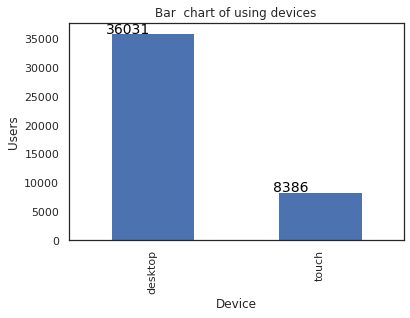

In [68]:
#ploting bar chart
ax_conversion_0days_device = conversion_0days.groupby('Device')['Uid'].count().plot(kind='bar', title='Bar  chart of using devices')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax_conversion_0days_device.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax_conversion_0days_device.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_conversion_0days_device.text(i.get_x()-.03, i.get_height()+.5, \
            str(int(i.get_height())), fontsize=14,
                color='black')
    
plt.ylabel('Users')
plt.show()

Most clients use desktop to reach services.

In [69]:
conversion_0days.groupby('Source Id')['Uid'].count()

Source Id
1      5699
2      6210
3      9682
4     10850
5      8592
7         1
9      2027
10     1356
Name: Uid, dtype: int64

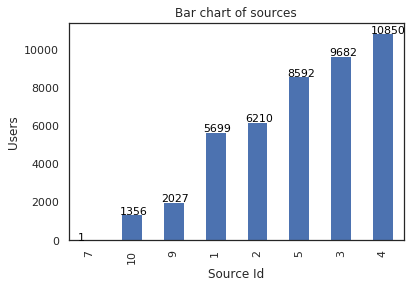

In [70]:
ax_conversion_0days_source = conversion_0days.groupby('Source Id')['Uid'].count().sort_values().plot(kind='bar', title='Bar chart of sources')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax_conversion_0days_source.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax_conversion_0days_source.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_conversion_0days_source.text(i.get_x()-.03, i.get_height()+.5, \
            str(int(i.get_height())), fontsize=11,
                color='black')

plt.ylabel('Users')
plt.show()

Most orders were made by users who were attracted using source_id 4, followed by source_id 3, and third by 5, and only one order was made from a user who came using source_id 7.

In [71]:
conversion_0days.groupby('start_month')['Uid'].count()

start_month
2017-06-01    2264
2017-07-01    2173
2017-08-01    1652
2017-09-01    2896
2017-10-01    5150
2017-11-01    5146
2017-12-01    5313
2018-01-01    4180
2018-02-01    4453
2018-03-01    4513
2018-04-01    2980
2018-05-01    3697
Name: Uid, dtype: int64

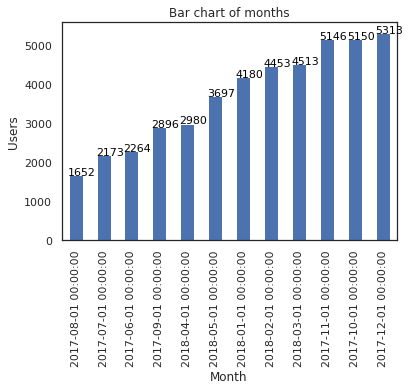

In [72]:
ax_conversion_0days_month = conversion_0days.groupby('start_month')['Uid'].count().sort_values().plot(kind='bar', title='Bar chart of months')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax_conversion_0days_month.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax_conversion_0days_month.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_conversion_0days_month.text(i.get_x()-.03, i.get_height()+.5, \
            str(int(i.get_height())), fontsize=11,
                color='black')

plt.xlabel('Month')
plt.ylabel('Users')
plt.show()

October to March is the coldest time of the year in Russia and therefore Yandex Afisha services are in great demand, in the period from April to September the weather is better, people try to organize leisure in nature, and not in the cinema or theaters, and also the period of summer vacations begins approximately from May to September. In addition, for example, in August (the month with the lowest level of orders according to the available data) there are no performances in most theaters, just like most people this is the most vacation month. 

**CONCLUSION**

It can be concluded that mostly users place an order on the same day they register. Most use the service from a desktop and the main source from which users were attracted is source number 4. In addition, seasonality is observed. The service is more popular from October to March.

### How many orders do they make during a given period of time? <a class="anchor" id="how-many-orders-do-they-make-during-a-given-period-of-time"></a>

In [73]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [74]:
first_order_date_by_users = orders.groupby('Uid')['Buy Ts'].min()
first_order_date_by_users.name = 'first_order_date'
orders = orders.join(first_order_date_by_users,on='Uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'Uid':'nunique'})
orders_grouped_by_cohorts.head()

Uid
first_order_month order_month      
2017-06-01        2017-06-01   2023
                  2017-07-01     61
                  2017-08-01     50
                  2017-09-01     54
                  2017-10-01     88

In [75]:
orders_grouped_by_cohorts_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',
columns='order_month',values='Uid',aggfunc='sum')
orders_grouped_by_cohorts_pivot

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


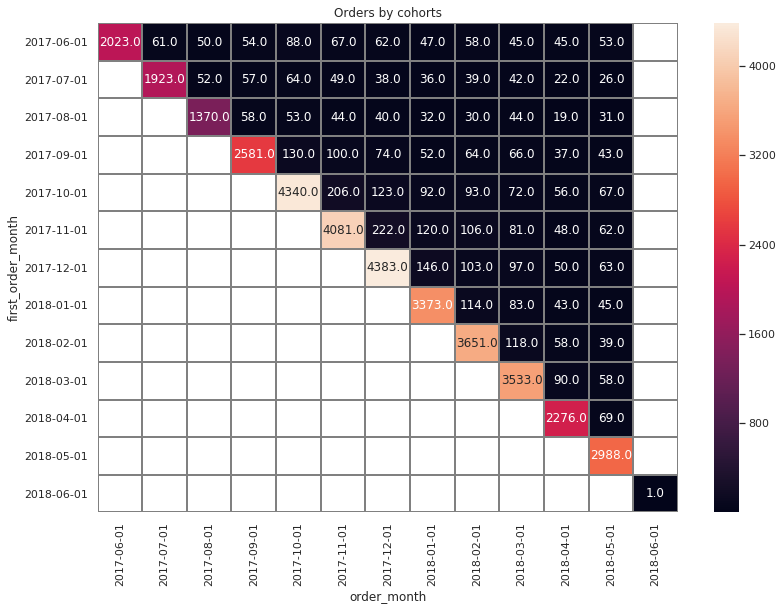

In [76]:

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Orders by cohorts')
heatmap = sns.heatmap(
    orders_grouped_by_cohorts_pivot, annot=True, fmt='.1f',linewidths=1, linecolor='gray'
) 
xticklabels = []
for item in heatmap.get_xticklabels():
    item.set_text(str(item.get_text())[:10])
    xticklabels += [item]
yticklabels = []
for item in heatmap.get_yticklabels():
    item.set_text(str(item.get_text())[:10])
    yticklabels += [item]

heatmap.set_xticklabels(xticklabels)
heatmap.set_yticklabels(yticklabels)

plt.show()


**CONCLUSION**

The maximum number of orders was made in cohort December 2017, and the minimum in cohort August, which also confirms the earlier conclusion about the seasonality of the service Yandex.Afisha.

### What is the average purchase size? <a class="anchor" id="what-is-the-average-purchase-size"></a>

In [77]:
orders_grouped_by_cohorts_revenue = orders.groupby(['first_order_month','order_month']).agg({'Revenue':'sum',
                                                                                     'Uid':'nunique'})
orders_grouped_by_cohorts_revenue.head(10)

Revenue   Uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88
                  2017-11-01   1487.92    67
                  2017-12-01   1922.74    62
                  2018-01-01   1176.56    47
                  2018-02-01   1119.15    58
                  2018-03-01   1225.51    45

In [78]:
orders_grouped_by_cohorts_revenue = orders_grouped_by_cohorts_revenue.reset_index()
orders_grouped_by_cohorts_revenue['cohort_lifetime'] = orders_grouped_by_cohorts_revenue['order_month'] - orders_grouped_by_cohorts_revenue['first_order_month']
orders_grouped_by_cohorts_revenue['cohort_lifetime'].head() 

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [79]:
orders_grouped_by_cohorts_revenue['cohort_lifetime'] = orders_grouped_by_cohorts_revenue['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts_revenue['cohort_lifetime'] = orders_grouped_by_cohorts_revenue['cohort_lifetime'].round().astype('int')



In [80]:
orders_grouped_by_cohorts_revenue['first_order_month'].dt.strftime('%d.%m.%Y') 
orders_grouped_by_cohorts_revenue['first_order_month'] = orders_grouped_by_cohorts_revenue['first_order_month'].dt.strftime('%Y-%m')


In [81]:

revenue_pivot = orders_grouped_by_cohorts_revenue.pivot_table(index='first_order_month',
                columns='cohort_lifetime',values='Revenue',aggfunc='mean')

revenue_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,9557.49,981.82,885.34,1931.30,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62
2017-07,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,NaN
2017-08,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,NaN,NaN
2017-09,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,NaN,NaN,NaN
2017-10,21716.20,2325.21,830.65,682.01,657.77,522.37,368.10,501.14,NaN,NaN,NaN,NaN
2017-11,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,NaN,NaN,NaN,NaN,NaN
2017-12,20767.49,1141.22,4054.70,4669.10,1371.57,1481.66,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,13949.50,994.22,1026.34,481.59,211.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,15177.16,1015.98,286.66,270.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


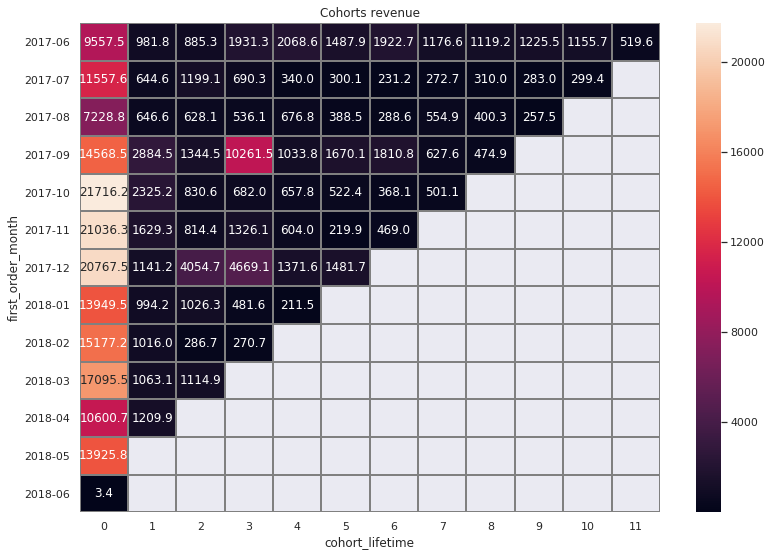

In [82]:
sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Cohorts revenue')
heatmap_revenue = sns.heatmap(revenue_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')


xticklabels = []
for item in heatmap_revenue.get_xticklabels():
    item.set_text(str(item.get_text())[:10])
    xticklabels += [item]
yticklabels = []
for item in heatmap_revenue.get_yticklabels():
    item.set_text(str(item.get_text())[:10])
    yticklabels += [item]

heatmap_revenue.set_xticklabels(xticklabels)
heatmap_revenue.set_yticklabels(yticklabels)
plt.show() 

**CONCLUSION**

The average purchase size ranges from 7000 to 22000 for the first time of cohort. In subsequent cohort-lifetime, the level decreases significantly.

### How much money do they bring? (LTV) <a class="anchor" id="how-much-money-do-they-bring"></a>

In [83]:
orders.head()

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [84]:
orders['Buy Ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: Buy Ts, dtype: object

In [85]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [86]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [87]:
# capturing the months from the dates in the table of costs
costs['month'] = costs['dt'].astype('datetime64[M]') 

In [88]:
#calculating the number of new customers (n_buyers) for each month
cohort_sizes = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [89]:
#grouping the table of orders by month of first purchase and month of purchase and counting the revenue. 
cohorts = orders.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head() 

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


We got a table that contains data on revenue which each cohort brought. For example, from the 0 row we can see that the customers who placed their first order in June 2017 brought in a total revenue of 9557.49 that month.

In [90]:
#adding data on how many users made their first purchases in each month to the cohorts table
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head() 

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [91]:
margin_rate = 1
# finding the gross profit
report['gp'] = report['Revenue'] * margin_rate
# finding thу age og cohort
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


In [92]:
#calculating LTV
report['ltv'] = report['gp'] / report['n_buyers']
report

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562


In [93]:
report_pivot = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

In [94]:
report_pivot_cumsum = report_pivot.cumsum(axis=1)
report_pivot_cumsum

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


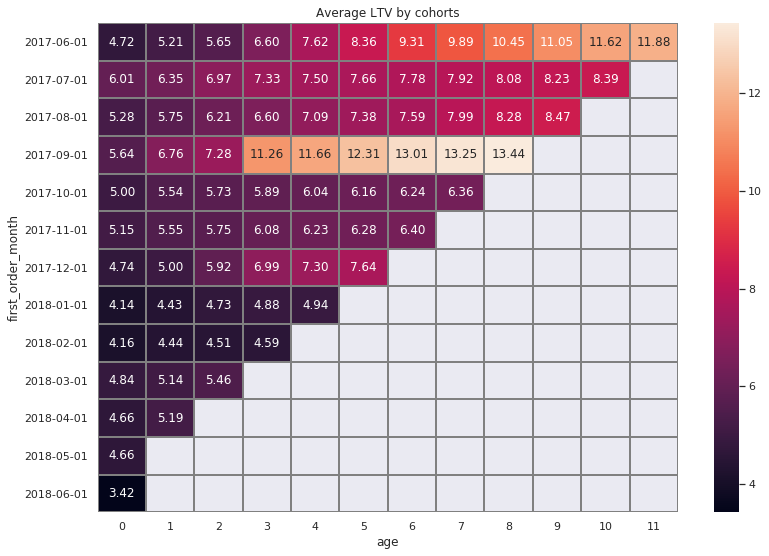

In [95]:
sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Average LTV by cohorts')


heatmap_report_pivot = sns.heatmap(report_pivot.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray')


xticklabels = []
for item in heatmap_report_pivot.get_xticklabels():
    item.set_text(str(item.get_text())[:10])
    xticklabels += [item]
yticklabels = []
for item in heatmap_report_pivot.get_yticklabels():
    item.set_text(str(item.get_text())[:10])
    yticklabels += [item]

heatmap_report_pivot.set_xticklabels(xticklabels)
heatmap_report_pivot.set_yticklabels(yticklabels)
plt.show() 

In this table we can find that, for example, for June 2017-cohort average LTV for 6 months from the first order is 8.36. But for the September-cohort higher - 12.31. Also we can note that even for 12 months from first order average LTV of June-cohort does not reach this level. It is only 11.88. The highest average LTV is 13.44 for 9 months from the first order in September 2017.

**SALES OVERVIEW**

In conclusion, it should be noted that the majority of orders are made during the first day, mainly from desktop, and most buyers are attracted using source number 4. The most active customers are in the period from October to March, the maximum number of orders is made in December. The most successful was cohort 4 (people who made their first purchase in September 2017). On average, each customer from the 4 cohort brought 13.43 in revenue over their 9-month liftetime, in comparison, each customer from the first cohort brought 11.88 over their 12-month liftetime. 

### 2.3. Marketing <a class="anchor" id="marketing"></a>

### How much money was spent? Overall/per source/over time <a class="anchor" id="How-much-money-was-spent"></a>

In [96]:
orders['Revenue'].sum().round()

252057.0

In [97]:
costs['costs'].sum().round()

329132.0

In [98]:
profit_loss = orders['Revenue'].sum().round() - costs['costs'].sum().round()
profit_loss

-77075.0

Overall there were spent 329132. Costs exceed revenue on 77075.

In [99]:
costs.groupby('source_id')['costs'].sum().sort_values()

source_id
9       5517.49
10      5822.49
1      20833.27
2      42806.04
5      51757.10
4      61073.60
3     141321.63
Name: costs, dtype: float64

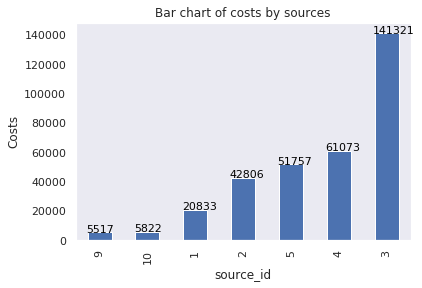

In [100]:
ax = costs.groupby('source_id')['costs'].sum().sort_values().plot(kind='bar', title='Bar chart of costs by sources')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(int(i.get_height())), fontsize=11,
                color='black')
plt.ylabel('Costs')
plt.show()

Most of the costs were for the source_id number 3. And the least for the source_id number 9.

In [101]:
costs_pivot = costs.pivot_table(
    index='month', 
    columns='source_id', 
    values='costs', 
    aggfunc='mean').round(2)
costs_pivot

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,37.52,80.91,257.72,117.16,87.20,9.51,10.47
2017-07-01,34.61,75.26,247.56,113.86,96.71,9.76,10.64
2017-08-01,30.70,58.42,198.18,103.79,70.49,8.03,7.50
2017-09-01,50.07,99.52,332.12,173.08,128.30,13.85,15.36
2017-10-01,74.70,156.29,507.65,207.12,186.05,19.66,20.23
2017-11-01,81.51,174.92,567.51,179.63,210.84,22.77,26.41
2017-12-01,75.52,157.99,523.21,247.76,189.44,21.23,20.83
2018-01-01,70.52,134.12,477.70,188.15,173.27,17.65,19.82
2018-02-01,78.73,159.80,508.16,204.00,181.12,19.70,17.17


In the pivot table we can found average costs for different source_id by months. For example in June for the source_id number 3 was spent 257.72 and for the source_id number 9 only 9.51. 

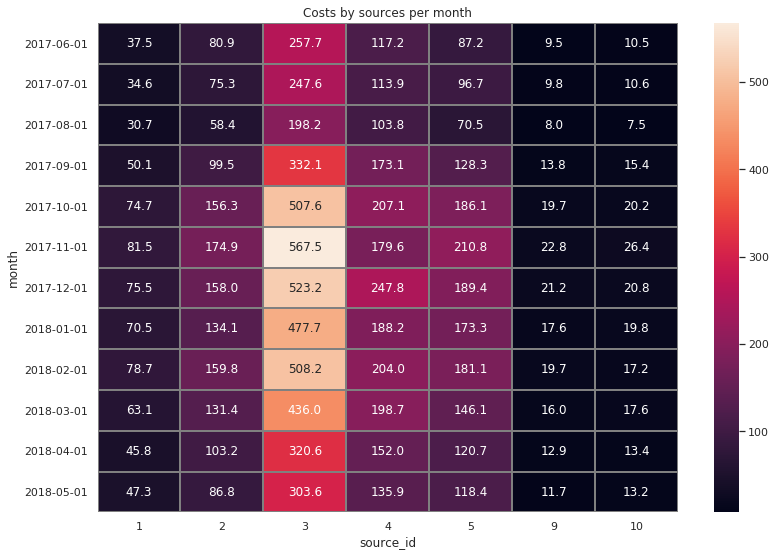

In [102]:
sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Costs by sources per month')


heatmap_costs = sns.heatmap(costs_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')


xticklabels = []
for item in heatmap_costs.get_xticklabels():
    item.set_text(str(item.get_text())[:10])
    xticklabels += [item]
yticklabels = []
for item in heatmap_costs.get_yticklabels():
    item.set_text(str(item.get_text())[:10])
    yticklabels += [item]

heatmap_costs.set_xticklabels(xticklabels)
heatmap_costs.set_yticklabels(yticklabels)
plt.show() 

The heatmap clearly shows that the main costs are attributed to the source_id number 3.

**CONCLUSION**

We can note that 329132.0 was spent in total, the most spent on source 3, we see that by October-December expenses increased, and then they began to decline.

### How much did customer acquisition from each of the sources cost? (CAC) <a class="anchor" id="how-much-did-customer-acquisition-from-each-of-the-sources-cost"></a>

In [103]:
#finding devices and source_ids for each customer
visits_short2 = visits.groupby('Uid')[['Device','Source Id']].agg(list).reset_index()


In [104]:
visits_short2.head(20)

,Uid,Device,Source Id
0,11863502262781,[touch],[3]
1,49537067089222,[touch],[2]
2,297729379853735,[desktop],[3]
3,313578113262317,"[desktop, desktop, desktop]","[2, 2, 2]"
4,325320750514679,"[desktop, desktop]","[5, 5]"
5,397399764396656,[touch],[4]
6,407573351275847,[desktop],[2]
7,498809019029702,[desktop],[4]
8,526778907996220,"[desktop, desktop, desktop, desktop]","[2, 2, 2, 2]"
9,577434573913691,"[desktop, desktop]","[9, 9]"


In [105]:
visits_and_orders = pd.merge(visits_short2, orders, on='Uid')

In [106]:
visits_and_orders.head()

,Uid,Device,Source Id,Buy Ts,Revenue,first_order_date,first_order_month,order_month
0,313578113262317,"[desktop, desktop, desktop]","[2, 2, 2]",2018-01-03 21:51:00,0.55,2018-01-03 21:51:00,2018-01-01,2018-01-01
1,1575281904278712,"[touch, touch]","[10, 10]",2017-06-03 10:13:00,1.22,2017-06-03 10:13:00,2017-06-01,2017-06-01
2,1575281904278712,"[touch, touch]","[10, 10]",2017-06-03 17:39:00,1.83,2017-06-03 10:13:00,2017-06-01,2017-06-01
3,2429014661409475,[desktop],[3],2017-10-11 18:33:00,73.33,2017-10-11 18:33:00,2017-10-01,2017-10-01
4,2464366381792757,"[desktop, desktop]","[5, 5]",2018-01-28 15:54:00,2.44,2018-01-28 15:54:00,2018-01-01,2018-01-01


In [107]:
#finding  most frequent source id for each customer
def most_frequent(List):
    counter = 0
    num = List[0]
      
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
  
    return num

visits_and_orders['Source Id'] = visits_and_orders.apply(lambda x: most_frequent(x['Source Id']), axis=1)

visits_and_orders.head()



,Uid,Device,Source Id,Buy Ts,Revenue,first_order_date,first_order_month,order_month
0,313578113262317,"[desktop, desktop, desktop]",2,2018-01-03 21:51:00,0.55,2018-01-03 21:51:00,2018-01-01,2018-01-01
1,1575281904278712,"[touch, touch]",10,2017-06-03 10:13:00,1.22,2017-06-03 10:13:00,2017-06-01,2017-06-01
2,1575281904278712,"[touch, touch]",10,2017-06-03 17:39:00,1.83,2017-06-03 10:13:00,2017-06-01,2017-06-01
3,2429014661409475,[desktop],3,2017-10-11 18:33:00,73.33,2017-10-11 18:33:00,2017-10-01,2017-10-01
4,2464366381792757,"[desktop, desktop]",5,2018-01-28 15:54:00,2.44,2018-01-28 15:54:00,2018-01-01,2018-01-01


In [108]:
#finding most frequent device for each user
def most_frequent(List):
    return max(set(List), key = List.count)
  
visits_and_orders['Device'] = visits_and_orders.apply(lambda x: most_frequent(x['Device']), axis=1)

visits_and_orders.head()

,Uid,Device,Source Id,Buy Ts,Revenue,first_order_date,first_order_month,order_month
0,313578113262317,desktop,2,2018-01-03 21:51:00,0.55,2018-01-03 21:51:00,2018-01-01,2018-01-01
1,1575281904278712,touch,10,2017-06-03 10:13:00,1.22,2017-06-03 10:13:00,2017-06-01,2017-06-01
2,1575281904278712,touch,10,2017-06-03 17:39:00,1.83,2017-06-03 10:13:00,2017-06-01,2017-06-01
3,2429014661409475,desktop,3,2017-10-11 18:33:00,73.33,2017-10-11 18:33:00,2017-10-01,2017-10-01
4,2464366381792757,desktop,5,2018-01-28 15:54:00,2.44,2018-01-28 15:54:00,2018-01-01,2018-01-01


In [109]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [110]:
# calculating the revenue by sources
revenue_by_source = visits_and_orders.groupby(['Source Id']).agg({'Revenue': 'sum'}).reset_index()
revenue_by_source.columns = ['source_id', 'Revenue']
revenue_by_source

,source_id,Revenue
0,1,39966.05
1,2,69101.78
2,3,41477.75
3,4,50512.32
4,5,40571.23
5,7,1.22
6,9,6463.20
7,10,3963.65


In [111]:
#calculating the number of new customers (n_buyers) for each month by source_id
number_buyers_by_source = visits_and_orders.groupby(['Source Id']).agg({'Uid': 'nunique'}).reset_index()
number_buyers_by_source.columns = ['source_id', 'n_buyers']
number_buyers_by_source

,source_id,n_buyers
0,1,3638
1,2,4439
2,3,8967
3,4,10039
4,5,6792
5,7,1
6,9,1420
7,10,1227


In [112]:
ltv_by_source = pd.merge(number_buyers_by_source, revenue_by_source, on='source_id')
ltv_by_source

,source_id,n_buyers,Revenue
0,1,3638,39966.05
1,2,4439,69101.78
2,3,8967,41477.75
3,4,10039,50512.32
4,5,6792,40571.23
5,7,1,1.22
6,9,1420,6463.20
7,10,1227,3963.65


In [113]:
#calculating LTV by source (margin rate = 1)
ltv_by_source['ltv'] = ltv_by_source['Revenue'] / ltv_by_source['n_buyers']
ltv_by_source

,source_id,n_buyers,Revenue,ltv
0,1,3638,39966.05,10.985720
1,2,4439,69101.78,15.566970
2,3,8967,41477.75,4.625599
3,4,10039,50512.32,5.031609
4,5,6792,40571.23,5.973385
5,7,1,1.22,1.220000
6,9,1420,6463.20,4.551549
7,10,1227,3963.65,3.230359


In [114]:
# calculating the costs by  sources
costs_by_source = costs.groupby(['source_id']).agg({'costs': 'sum'}).reset_index()
costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [115]:
cac_by_source = pd.merge(ltv_by_source, costs_by_source, on='source_id')
cac_by_source['cac'] = cac_by_source['costs'] / cac_by_source['n_buyers']
cac_by_source

,source_id,n_buyers,Revenue,ltv,costs,cac
0,1,3638,39966.05,10.985720,20833.27,5.726572
1,2,4439,69101.78,15.566970,42806.04,9.643172
2,3,8967,41477.75,4.625599,141321.63,15.760191
3,4,10039,50512.32,5.031609,61073.60,6.083634
4,5,6792,40571.23,5.973385,51757.10,7.620303
5,9,1420,6463.20,4.551549,5517.49,3.885556
6,10,1227,3963.65,3.230359,5822.49,4.745306


In [116]:
# calculating the revenue by month
revenue_by_month = visits_and_orders.groupby(['order_month']).agg({'Revenue': 'sum'}).reset_index()
revenue_by_month.columns = ['month', 'Revenue']

#calculating the number of  customers (n_buyers) by month
number_buyers_by_month = visits_and_orders.groupby(['order_month']).agg({'Uid': 'nunique'}).reset_index()
number_buyers_by_month.columns = ['month', 'n_buyers']

#merging tables of revenue and numbers of buyers
ltv_by_month = pd.merge(number_buyers_by_month, revenue_by_month, on='month')

#calculating LTV by month
ltv_by_month['ltv'] = ltv_by_month['Revenue'] / ltv_by_month['n_buyers']

#calculating costs by month
costs_by_month = costs.groupby(['month']).agg({'costs': 'sum'}).reset_index() 

#calculating CAC by month
cac_by_month = pd.merge(ltv_by_month, costs_by_month, on='month')
cac_by_month['cac'] = cac_by_month['costs'] / cac_by_month['n_buyers']
cac_by_month

,month,n_buyers,Revenue,ltv,costs,cac
0,2017-06-01,2023,9557.49,4.724414,18015.00,8.905091
1,2017-07-01,1984,12539.47,6.320297,18240.59,9.193846
2,2017-08-01,1472,8758.78,5.950258,14790.54,10.047921
3,2017-09-01,2750,18345.51,6.671095,24368.91,8.861422
4,2017-10-01,4675,27987.70,5.986674,36322.88,7.769600
5,2017-11-01,4547,27069.93,5.953360,37907.88,8.336899
6,2017-12-01,4942,36388.60,7.363132,38315.35,7.753005
7,2018-01-01,3898,19417.13,4.981306,33518.52,8.598902
8,2018-02-01,4258,25560.54,6.002945,32723.03,7.685070
9,2018-03-01,4181,28834.59,6.896577,30415.27,7.274640


**CONCLUSION**

The highst CAC was for the source_id number 3 (15,76), and the lowest for source_id 9 (3,89). The highest CAC value was in August, the month in which there are fewer buyers and less revenue.

### How worthwhile where the investments? (ROI) <a class="anchor" id="how_many_people_use_product_every_day_week_and_month"></a>

In [117]:
visits_and_orders.head()

,Uid,Device,Source Id,Buy Ts,Revenue,first_order_date,first_order_month,order_month
0,313578113262317,desktop,2,2018-01-03 21:51:00,0.55,2018-01-03 21:51:00,2018-01-01,2018-01-01
1,1575281904278712,touch,10,2017-06-03 10:13:00,1.22,2017-06-03 10:13:00,2017-06-01,2017-06-01
2,1575281904278712,touch,10,2017-06-03 17:39:00,1.83,2017-06-03 10:13:00,2017-06-01,2017-06-01
3,2429014661409475,desktop,3,2017-10-11 18:33:00,73.33,2017-10-11 18:33:00,2017-10-01,2017-10-01
4,2464366381792757,desktop,5,2018-01-28 15:54:00,2.44,2018-01-28 15:54:00,2018-01-01,2018-01-01


In [118]:
#grouping by first_order_month  and order_month
cohort_grouped = visits_and_orders.groupby(['first_order_month', 'order_month']).agg(
    {'Uid': 'nunique', 'Revenue': 'sum'}
)

#grouping costs by month
costs_grouped = costs.groupby('month').agg(
    {'costs': 'sum'}
)
#renaming column
cohort_grouped = cohort_grouped.reset_index().rename(columns={'first_order_month':'month'})
#joining tables with revenue and table with costs by month
cohort_grouped = cohort_grouped.join(costs_grouped, on='month')

cohort_grouped = cohort_grouped.reset_index()

#counting cohort lifetime
cohort_grouped['cohort_lifetime'] = cohort_grouped['order_month'] - cohort_grouped['month']
cohort_grouped['cohort_lifetime'] = cohort_grouped['cohort_lifetime'] / np.timedelta64(1,'M')
cohort_grouped['cohort_lifetime'] = cohort_grouped['cohort_lifetime'].round().astype('int')

#counting LTV, CAC, ROI and adding new columns to the table
cohort_grouped['ltv'] = cohort_grouped['Revenue']/cohort_grouped['Uid']
cohort_grouped['cac'] = cohort_grouped['costs']/cohort_grouped['Uid']
cohort_grouped['roi'] = cohort_grouped['ltv']/cohort_grouped['cac']
cohort_grouped.head()

,index,month,order_month,Uid,Revenue,costs,cohort_lifetime,ltv,cac,roi
0,0,2017-06-01,2017-06-01,2023,9557.49,18015.0,0,4.724414,8.905091,0.530530
1,1,2017-06-01,2017-07-01,61,981.82,18015.0,1,16.095410,295.327869,0.054500
2,2,2017-06-01,2017-08-01,50,885.34,18015.0,2,17.706800,360.300000,0.049145
3,3,2017-06-01,2017-09-01,54,1931.30,18015.0,3,35.764815,333.611111,0.107205
4,4,2017-06-01,2017-10-01,88,2068.58,18015.0,4,23.506591,204.715909,0.114825


In [119]:
#forming pivot table
lifetime_pivot = cohort_grouped.pivot_table(index='month',columns='cohort_lifetime',values='roi',aggfunc='sum')


In [120]:
lifetime_pivot.cumsum(axis=1)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
month,,,,,,,,,,,,
2017-06-01,0.530530,0.585030,0.634174,0.741379,0.856205,0.938798,1.045528,1.110838,1.172961,1.240989,1.305138,1.333982
2017-07-01,0.633623,0.668962,0.734697,0.772542,0.791180,0.807631,0.820304,0.835255,0.852253,0.867766,0.884178,NaN
2017-08-01,0.488747,0.532466,0.574934,0.611176,0.656939,0.683202,0.702715,0.740230,0.767297,0.784708,NaN,NaN
2017-09-01,0.597833,0.716200,0.771374,1.192464,1.234889,1.303422,1.377732,1.403485,1.422974,NaN,NaN,NaN
2017-10-01,0.597866,0.661881,0.684749,0.703525,0.721634,0.736016,0.746150,0.759947,NaN,NaN,NaN,NaN
2017-11-01,0.554931,0.597911,0.619394,0.654377,0.670312,0.676112,0.688485,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.542015,0.571800,0.677624,0.799484,0.835281,0.873951,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.416173,0.445835,0.476455,0.490823,0.497132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.463807,0.494855,0.503615,0.511887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


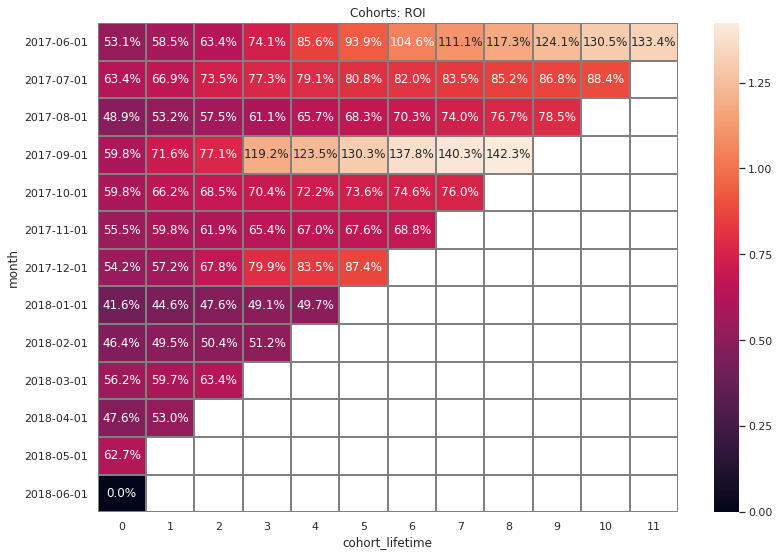

In [121]:
#ploting heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROI')
lifetime_heatmap = sns.heatmap(
    lifetime_pivot.cumsum(axis=1), annot=True, fmt='.1%', linewidths=1, linecolor='gray'
) 
xticklabels = []
for item in lifetime_heatmap.get_xticklabels():
    item.set_text(str(item.get_text())[:10])
    xticklabels += [item]
yticklabels = []
for item in lifetime_heatmap.get_yticklabels():
    item.set_text(str(item.get_text())[:10])
    yticklabels += [item]

lifetime_heatmap.set_xticklabels(xticklabels)
lifetime_heatmap.set_yticklabels(yticklabels)

plt.show()

**CONCLUSION** 

According to the table with cumulative ROMI we can say that only two cohorts paid off. The June cohort paid off in the 7th month (ROMI = 1.05). The September cohort paid off in the 4th month (ROMI = 1.19). So we can conclude that the September cohort paid off the fastest.

**MARKETING OVERVIEW**

We can conclude that in whole costs exceed revenue. Only two cohorts paid off and the rest of cohorts didn't.
Most of the costs were for the source number 3. We noted that by October-December expenses increased, and then they began to decline. Wherein the highest CAC value was in August, the month in which there are fewer buyers and less revenue.

## STEP 3. General conclusion <a class="anchor" id="third-step"></a>

For drawing of the general conclusion we have analyzed 3 tables with the following data: visits, orders, costs for the period from 01.06.2017 till 01.06.2018. 

Summarizing all overviews from product, sales and marketing blocks we can conclude that in general it looks well for investors and for further product development.

Considering all pre-conclusions we would recommend to concentrate on the following items:
<ul>
<li>	improvement of the mobile version of the application in order to increase the customers number and cash flow </li>
<li>	offering better or more attractive conditions for the 2nd and further orders, maybe some kind of discount system, in order to stimulate the customers to follow up with next orders</li>
<li>	foreseeing of another spectrum of entertainment and special items in the periods with good weather conditions (April – September)</li>
<li>	re-checking of source ids with low deposits and considering of their improvement or exclusion. For example, it should be noted that the majority of customers who made an order were attracted by source number 4. But the main costs are attributed to source number 3.</li>
</ul>